In [ ]:
import numpy as np
import pandas as pd

In [ ]:
dataset = pd.read_csv('quora_questions_copy.csv')
dataset.head()

,Question
0,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,How can I increase the speed of my internet co...
3,Why am I mentally very lonely? How can I solve...
4,"Which one dissolve in water quikly sugar, salt..."


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df = 0.9,min_df = 2,stop_words="english")
Document_term_matrix = tfidf.fit_transform(dataset['Question'])
Document_term_matrix

<404289x38669 sparse matrix of type '<class 'numpy.float64'>'
	with 2002912 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.decomposition import NMF
NMF_model = NMF(n_components=10,random_state=0)
NMF_model.fit(Document_term_matrix)

NMF(n_components=10, random_state=0)

In [ ]:
len(tfidf.get_feature_names_out())

38669

In [ ]:
print(len(NMF_model.components_))
print(NMF_model.components_)

10
[[5.49503724e-05 5.20778531e-02 4.62443481e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.55669990e-03 4.10703633e-04 2.88399861e-05 ... 0.00000000e+00
  3.17146532e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [2.34859883e-05 1.79636577e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.36181666e-03 4.41648400e-02 3.88082623e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.32006679e-04 4.86071800e-03 1.91941351e-05 ... 1.81188821e-05
  0.00000000e+00 1.81188821e-05]]


In [ ]:
len(NMF_model.components_[3])

38669

In [ ]:
single_topic = NMF_model.components_[0]
single_topic.argsort()

array([38668, 13394, 13393, ..., 22925, 37515,  4632])

In [ ]:
print(f'Word least resentative of the first topic -> {single_topic[38668]}')
print(f'Word most resentative of the first topic -> {single_topic[4632]}')

Word least resentative of the first topic -> 0.0
Word most resentative of the first topic -> 7.378972010359136


In [ ]:
for index,topic in enumerate(NMF_model.components_):
  print(f'The Top 10 words representing topic number {index+1}')
  print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
  print("\n")

The Top 10 words representing topic number 1
['time', 'movie', 'ways', 'weight', '2016', 'books', 'book', 'movies', 'way', 'best']


The Top 10 words representing topic number 2
['really', 'cost', 'time', 'sex', 'long', 'work', 'feel', 'like', 'mean', 'does']


The Top 10 words representing topic number 3
['improvement', 'delete', 'asked', 'google', 'answers', 'answer', 'ask', 'question', 'questions', 'quora']


The Top 10 words representing topic number 4
['easiest', 'home', 'easy', 'youtube', 'ways', 'way', 'earn', 'online', 'make', 'money']


The Top 10 words representing topic number 5
['moment', 'things', 'good', 'real', 'day', 'important', 'thing', 'meaning', 'purpose', 'life']


The Top 10 words representing topic number 6
['business', 'spotify', 'country', 'start', 'job', 'good', 'world', 'war', 'pakistan', 'india']


The Top 10 words representing topic number 7
['learning', 'skills', 'start', 'way', 'good', 'improve', 'programming', 'language', 'english', 'learn']


The Top 10

In [ ]:
Document_term_matrix.shape

(404289, 38669)

In [ ]:
topic_words = NMF_model.transform(Document_term_matrix)
topic_words.shape

(404289, 10)

In [ ]:
print(topic_words[1880].round(3))
print(f'This word belongs to category {topic_words[1880].argmax()+1}')

[0.    0.022 0.    0.    0.    0.001 0.    0.    0.005 0.   ]
This word belongs to category 2


In [ ]:
topic_words.argmax(axis = 1)

array([5, 0, 3, ..., 8, 8, 9])

In [ ]:
mytopic_dict = {0:'Knowledge_Sector',1:'General_Sector',2:'Online Q&A_Sector',3:'Digital_Sector',4:'Life_Sector',5:'Company_Sector',6:'Skills_Sector',7:'Election_Sector',8:'Curiosity_Sector',9:'Personal_Sector'}
dataset['Category No.'] = topic_words.argmax(axis=1)
dataset['Category Names.'] = dataset['Category No.'].map(mytopic_dict)

In [ ]:
dataset.head(15)

,Question,Category No.,Category Names.
0,What is the step by step guide to invest in sh...,5,Company_Sector
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,0,Knowledge_Sector
2,How can I increase the speed of my internet co...,3,Digital_Sector
3,Why am I mentally very lonely? How can I solve...,8,Curiosity_Sector
4,"Which one dissolve in water quikly sugar, salt...",1,General_Sector
5,Astrology: I am a Capricorn Sun Cap moon and c...,1,General_Sector
6,Should I buy tiago?,0,Knowledge_Sector
7,How can I be a good geologist?,6,Skills_Sector
8,When do you use シ instead of し?,2,Online Q&A_Sector
9,Motorola (company): Can I hack my Charter Moto...,5,Company_Sector


In [ ]:
pip install tensorflow_text

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404289 entries, 0 to 404288
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Question         404289 non-null  object
 1   Category No.     404289 non-null  int64 
 2   Category Names.  404289 non-null  object
dtypes: int64(1), object(2)
memory usage: 9.3+ MB


In [ ]:
dataset.describe()

,Category No.
count,404289.000000
mean,4.811009
std,3.344277
min,0.000000
25%,1.000000
50%,5.000000
75%,9.000000
max,9.000000


In [ ]:
dataset['Category Names.'].value_counts()

Personal_Sector      101213
Knowledge_Sector      59771
General_Sector        50030
Company_Sector        44339
Skills_Sector         37632
Election_Sector       27426
Online Q&A_Sector     22033
Digital_Sector        21616
Life_Sector           21531
Curiosity_Sector      18698
Name: Category Names., dtype: int64

In [ ]:
dataset['Category Names.'].unique()
for i in range(len(dataset['Category Names.'].unique())):
  print(f"{dataset['Category Names.'].unique()[i]}")

Company_Sector
Knowledge_Sector
Digital_Sector
Curiosity_Sector
General_Sector
Skills_Sector
Online Q&A_Sector
Personal_Sector
Election_Sector
Life_Sector


In [ ]:
Curiosity_Sector = dataset[dataset['Category Names.'] == 'Curiosity_Sector']
# Curiosity_Sector = dataset.query("`Category Names.` == 'Curiosity_Sector'")
print(len(Curiosity_Sector))
Curiosity_Sector.sample(10)

18698


,Question,Category No.,Category Names.
122793,What are some advantages of the informal economy?,8,Curiosity_Sector
200197,"What are the benefits of schizophrenia, if any?",8,Curiosity_Sector
279671,What are the therapeutic implications of a lin...,8,Curiosity_Sector
350136,What are some of the most undervalued stocks i...,8,Curiosity_Sector
331595,My score is 447 in NEET and I am a girl studen...,8,Curiosity_Sector
139832,How can I increase my height I am 5'2 and 13 y...,8,Curiosity_Sector
324319,What were the major effects of the cambodia ea...,8,Curiosity_Sector
387231,How do I can identify original pashmina shawls?,8,Curiosity_Sector
103409,What do Indian men think of Indian women?,8,Curiosity_Sector
272774,Do Sony Bravia 3D tvs really have a feasible 3...,8,Curiosity_Sector


In [ ]:
lis=[101213,59771,50030,44339,37632,27426,22033,21616,21531,18698]
print(lis)

[101213, 59771, 50030, 44339, 37632, 27426, 22033, 21616, 21531, 18698]


In [ ]:
for i in range(10):
  print(f"{dataset['Category Names.'].unique()[i]} -> {round((((lis[i])/sum(lis))*100),2)}%")

Company_Sector -> 25.03%
Knowledge_Sector -> 14.78%
Digital_Sector -> 12.37%
Curiosity_Sector -> 10.97%
General_Sector -> 9.31%
Skills_Sector -> 6.78%
Online Q&A_Sector -> 5.45%
Personal_Sector -> 5.35%
Election_Sector -> 5.33%
Life_Sector -> 4.62%


<Axes: >

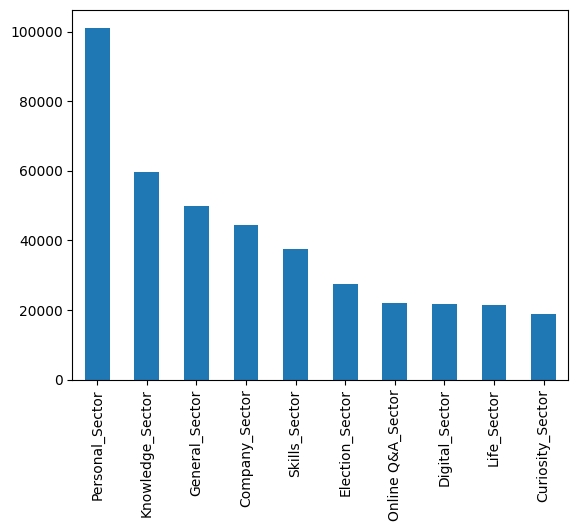

In [ ]:
dataset['Category Names.'].value_counts().plot.bar()

In [ ]:
dataset.head()

,Question,Category No.,Category Names.
0,What is the step by step guide to invest in sh...,5,Company_Sector
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,0,Knowledge_Sector
2,How can I increase the speed of my internet co...,3,Digital_Sector
3,Why am I mentally very lonely? How can I solve...,8,Curiosity_Sector
4,"Which one dissolve in water quikly sugar, salt...",1,General_Sector


In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 101.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 34.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import tensorflow as tf
from transformers import BertTokenizer

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

In [ ]:
token = tokenizer.encode_plus(
    dataset['Question'].iloc[0],
    max_length=256,
    truncation=True,
    padding='max_length',
    add_special_tokens=True,
    return_tensors='tf'
)


In [ ]:
token

{'input_ids': <tf.Tensor: shape=(1, 256), dtype=int32, numpy=
array([[  101,  1327,  1110,  1103,  2585,  1118,  2585,  6388,  1106,
        17557,  1107,  2934,  2319,  1107,  1107,  7168,   136,   102,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0, 

In [ ]:
X_input_ids = np.zeros((len(dataset), 256))
X_attn_masks = np.zeros((len(dataset), 256))

In [ ]:
def generate_training_data(df, ids, masks, tokenizer):
    for i, text in tqdm(enumerate(df['Question'])):
        tokenized_text = tokenizer.encode_plus(
            text,
            max_length=256,
            truncation=True,
            padding='max_length',
            add_special_tokens=True,
            return_tensors='tf'
        )
        ids[i, :] = tokenized_text.input_ids
        masks[i, :] = tokenized_text.attention_mask
    return ids, masks

In [ ]:
X_input_ids, X_attn_masks = generate_training_data(dataset, X_input_ids, X_attn_masks, tokenizer)

0it [00:00, ?it/s]

In [ ]:
labels = np.zeros((len(dataset), 10))
labels.shape

(404289, 10)

In [ ]:
labels[np.arange(len(dataset)), dataset['Category No.'].values] = 1

In [ ]:
labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
train_data = tf.data.Dataset.from_tensor_slices((X_input_ids, X_attn_masks, labels))
train_data.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(256,), dtype=tf.float64, name=None), TensorSpec(shape=(256,), dtype=tf.float64, name=None), TensorSpec(shape=(10,), dtype=tf.float64, name=None))>

In [ ]:
def QuoraDatasetMapFunction(input_ids, attn_masks, labels):
    return {
        'input_ids': input_ids,
        'attention_mask': attn_masks
    }, labels

In [ ]:
train_data = train_data.map(QuoraDatasetMapFunction)

In [ ]:
train_data.take(1)

<_TakeDataset element_spec=({'input_ids': TensorSpec(shape=(256,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(256,), dtype=tf.float64, name=None)}, TensorSpec(shape=(10,), dtype=tf.float64, name=None))>

In [ ]:
train_data = train_data.shuffle(10000).batch(16, drop_remainder=True)

In [ ]:
train_data.take(1)

<_TakeDataset element_spec=({'input_ids': TensorSpec(shape=(16, 256), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(16, 256), dtype=tf.float64, name=None)}, TensorSpec(shape=(16, 10), dtype=tf.float64, name=None))>

In [ ]:
train_size = int((len(dataset)//16)*0.8)
train_size

20214

In [ ]:
train_dataset = train_data.take(train_size)
val_dataset = train_data.skip(train_size)

In [ ]:
from transformers import TFBertModel

In [ ]:
model = TFBertModel.from_pretrained('bert-base-cased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
input_ids = tf.keras.layers.Input(shape=(256,), name='input_ids', dtype='int32')
attn_masks = tf.keras.layers.Input(shape=(256,), name='attention_mask', dtype='int32')

bert_embds = model.bert(input_ids, attention_mask=attn_masks)[1] # 0 -> activation layer (3D), 1 -> pooled output layer (2D)
intermediate_layer = tf.keras.layers.Dense(512, activation='relu', name='intermediate_layer')(bert_embds)
output_layer = tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(intermediate_layer) # softmax -> calcs probs of classes

Quora_model = tf.keras.Model(inputs=[input_ids, attn_masks], outputs=output_layer)
Quora_model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 256)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 256)]                0         []                            
 )                                                                                                
                                                                                                  
 bert (TFBertMainLayer)      TFBaseModelOutputWithPooli   1083102   ['input_ids[0][0]',           
                             ngAndCrossAttentions(last_   72         'attention_mask[0][0]']      
                             hidden_state=(None, 256, 7                                     

In [ ]:
optimize = tf.keras.optimizers.Adam(learning_rate = 1e-5, beta_1=0.9, beta_2=0.999)
loss_func = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

In [ ]:
Quora_model.compile(optimizer=optimize, loss=loss_func, metrics=[acc])

In [ ]:
hist = Quora_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=1
)

12571/20214 [=================>............] - ETA: 1:45:59 - loss: 0.5034 - accuracy: 0.8379

In [ ]:
Quora_model.save('quora_model')

In [ ]:
Quora_model = tf.keras.models.load_model('Quora_model')

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

def prepare_data(input_text, tokenizer):
    token = tokenizer.encode_plus(
        input_text,
        max_length=256,
        truncation=True,
        padding='max_length',
        add_special_tokens=True,
        return_tensors='tf'
    )
    return {
        'input_ids': tf.cast(token.input_ids, tf.float64),
        'attention_mask': tf.cast(token.attention_mask, tf.float64)
    }


In [ ]:
def make_prediction(model, processed_data, classes=['Knowledge_Sector', 'General_Sector', 'Online Q&A_Sector', 'Digital_Sector', 'Life_Sector','Company_Sector','Skills_Sector','Election_Sector','Curiosity_Sector','Personal_Sector']):
    probs = model.predict(processed_data)[0]
    return classes[np.argmax(probs)]

In [ ]:
input_text = input('Enter movie review here: ')
processed_data = prepare_data(input_text, tokenizer)
result = make_prediction(Quora_model, processed_data=processed_data)
print(f"Predicted Category: {result}")